<a href="https://colab.research.google.com/github/LeeJeaHyuk/colab-sync-practice/blob/main/%EB%A7%A4%EC%9D%BC_%EC%A1%B0%EA%B8%88%EC%94%A9_1%EC%9D%BC%EC%B0%A8_%EB%AC%B8%EC%A0%9C_5%2C6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 주제 : 데이터 분석으로 심부전증을 예방할 수 있을까?
----------

## 실습 가이드
    1. 데이터를 다운로드하여 Colab에 불러옵니다.
    2. 필요한 라이브러리는 모두 코드로 작성되어 있습니다.
    3. 코드는 위에서부터 아래로 순서대로 실행합니다.
    
    
## 데이터 소개
    - 이번 주제는 Heart Failure Prediction 데이터셋을 사용합니다.
    
    - 다음 1개의 csv 파일을 사용합니다.
    heart_failure_clinical_records_dataset.csv
    
    - 각 파일의 컬럼은 아래와 같습니다.
    age: 환자의 나이
    anaemia: 환자의 빈혈증 여부 (0: 정상, 1: 빈혈)
    creatinine_phosphokinase: 크레아틴키나제 검사 결과
    diabetes: 당뇨병 여부 (0: 정상, 1: 당뇨)
    ejection_fraction: 박출계수 (%)
    high_blood_pressure: 고혈압 여부 (0: 정상, 1: 고혈압)
    platelets: 혈소판 수 (kiloplatelets/mL)
    serum_creatinine: 혈중 크레아틴 레벨 (mg/dL)
    serum_sodium: 혈중 나트륨 레벨 (mEq/L)
    sex: 성별 (0: 여성, 1: 남성)
    smoking: 흡연 여부 (0: 비흡연, 1: 흡연)
    time: 관찰 기간 (일)
    DEATH_EVENT: 사망 여부 (0: 생존, 1: 사망)
    
    
    
- 데이터 출처: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data


## 최종 목표
    - 의료 데이터와 그 분석에 대한 이해
    - Colab 및 Pandas 라이브러리 사용법 이해
    - 데이터 시각화를 통한 인사이트 습득 방법의 이해
    - Scikit-learn 기반의 모델 학습 방법 습득
    - Classification 모델의 학습과 평가 방법 이해

- 출제자 : 신제용 강사
---

## Step 0. 의료 데이터셋에 대하여

### 의료 데이터의 수집


### 의료 데이터 분석의 현재


### Accuracy, Precision, 그리고 Recall

## Step 1. 데이터셋 준비하기

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 문제 1. Colab Notebook에 Kaggle API 세팅하기


In [ ]:
import os

In [ ]:
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
os.environ['KAGGLE_USERNAME'] ='leejeahyuk'
os.environ['KAGGLE_KEY'] ='909dc28f843ffc03b80b5291757fd8f0'


### 문제 2. 데이터 다운로드 및 압축 해제하기


In [ ]:
# Linux 명령어로 Kaggle API를 이용하여 데이터셋 다운로드하기 (!kaggle ~)
# Linux 명령어로 압축 해제하기
!kaggle datasets download -d andrewmvd/heart-failure-clinical-data

heart-failure-clinical-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip '*.zip'

Archive:  heart-failure-clinical-data.zip
replace heart_failure_clinical_records_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace heart_failure_clinical_records_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!ls

heart-failure-clinical-data.zip		    sample_data
heart_failure_clinical_records_dataset.csv


### 문제 3. Pandas 라이브러리로 csv파일 읽어들이기


In [ ]:
# pd.read_csv()로 csv파일 읽어들이기
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

## Step 2. EDA 및 데이터 기초 통계 분석


### 문제 5. 수치형 데이터의 히스토그램 그리기



1일차 시작

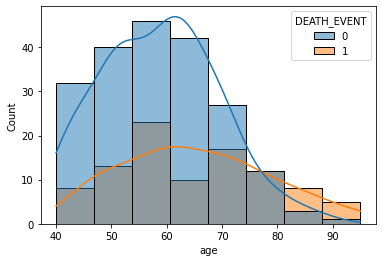

In [ ]:
# seaborn의 histplot, jointplot, pairplot을 이용해 히스토그램 그리기
sns.histplot(x='age', data=df, hue='DEATH_EVENT', bins=8, kde=True)
# kde는 Kernel Density Estimate 대충 밀도 그래프인듯
# hue를 사용해서 나이에 대해 DEATH_EVENT(죽은 사람의 수)를 히스토그램으로 보이기
# bins는 막대개수

In [ ]:
# loc? 행/열을 선택 
# 행번호로 선택 .iloc label이나 조건표현으로 선택 .loc
# 행이든 열이든 숫자로 location을 나타내서 Selecting or indexing 하는 방법

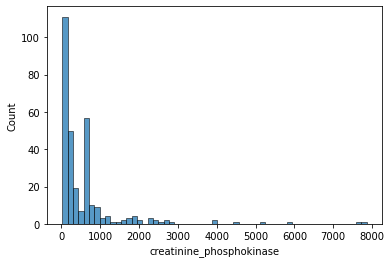

In [ ]:
sns.histplot(data=df, x='creatinine_phosphokinase')

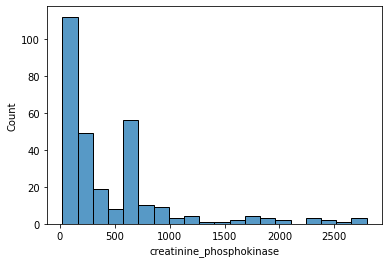

In [ ]:
# 수를 제한해서 추출? 이상값을 제외할때 사용하면 될 듯
# 데이터프레임에서 creatinine_phosphokinase 가 3000미만일 때 creatinine_phosphokinase를 히스토그램으로 표현
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'creatinine_phosphokinase'])

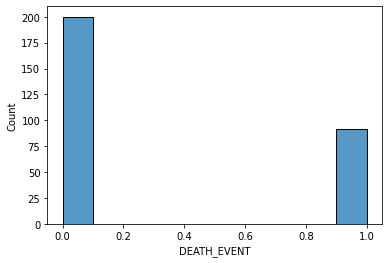

In [ ]:
sns.histplot(data=df.loc[df['creatinine_phosphokinase'] < 3000, 'DEATH_EVENT'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


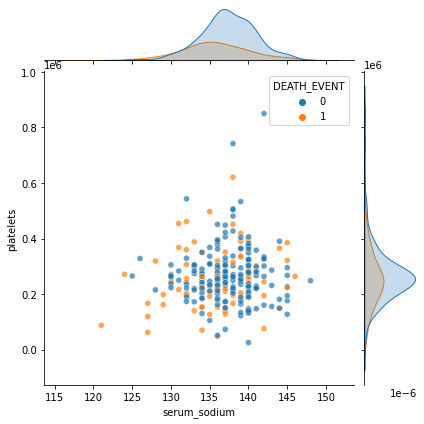

In [ ]:
#jointplot 산점도와 히스토그램을 같이 보여주는 것처럼 보인다
#산점도이므로 다른값들이 많아야 할 것 같아서 platelets,ejection_fraction,serum_sodium 등으로 해봤지만 선형적인 결과가 나오지는 않았다
# ejection_fraction 혈중 크레아틴 농도는 신장 기능에 영향을 주는 질환이나 상태를 높혀준다.
# 혈액의 정상 나트륨 농도는 1L당 140mmol 정도입니다. 저나트륨혈증은 나트륨 농도가 135mmol 미만인 경우를 의미
# alpha는 투명도
sns.jointplot( df.loc[df['serum_sodium']>120,'serum_sodium'], y='platelets', data=df, hue='DEATH_EVENT',alpha=0.7)


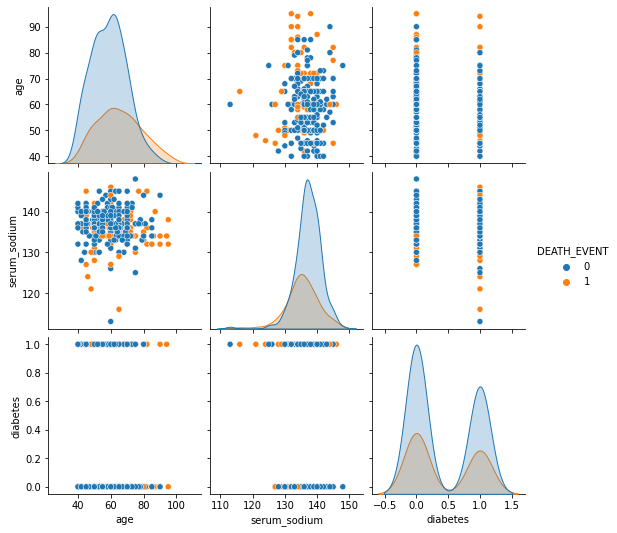

In [ ]:
# 일부 데이터프레임을 뽑아서 3x3형태로 9개의 그리드를 만든다 대각선에는 히스토그램 
# 서로 다를 변수는 산점도

dfA=df[['age','DEATH_EVENT','serum_sodium','diabetes']]
sns.pairplot(dfA,hue='DEATH_EVENT')


### 문제 6. Boxplot 계열을 이용하여 범주별 통계 확인하기


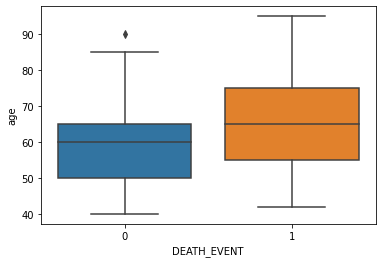

In [ ]:
# seaborn의 Boxplot 계열(boxplot(), violinplot(), swarmplot())을 사용
# Hint) hue 키워드를 사용하여 범주 세분화 가능
# 세로 방향으로 하려면 orient='v'사용
# UserWarning: Vertical orientation ignored with only `x` specified.라고 나오는데 x->y로 바꾸니까 해결됨
# x축은 데이터의 종류가 적은것으로 하면 더 보기 편해지는 듯 하다
sns.boxplot(data=df, x='DEATH_EVENT',y='age')




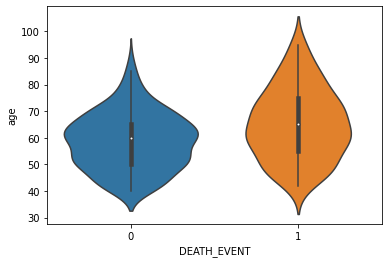

In [ ]:
# 바이올린 플롯
# 중심선을 따라 대칭인 kde 플롯이 있다
# 흰색 점은 중앙값을 나타낸다
# 중앙의 두꺼운 선은 사분위 범위를 나타낸다
# 중앙의 얇은 선은 신뢰 구간을 나타낸다
sns.violinplot(data=df, x='DEATH_EVENT',y='age')

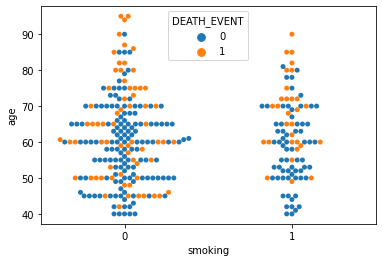

In [ ]:
# stripplot은 점을 그대로 찍어주는것 swarmplot은 점이 곂치지 않도록 옆으로 이동된다.
sns.swarmplot(data=df, x='smoking',y='age', hue='DEATH_EVENT')